### Analyzing Tabular Data using Python and Pandas

![tabular](https://i.imgur.com/zfxLzEv.png)

#### Pandas is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more.

CSVs: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. 

open csv file to analyse

In [2]:
from urllib.request import urlretrieve

In [5]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x22750f05280>)

In [6]:
!pip install pandas --upgrade --quiet

You should consider upgrading via the 'd:\python for data analysis\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd # alias pd

In [8]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [9]:
type(covid_df)

pandas.core.frame.DataFrame

In [10]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


* The file provides four day-wise counts for COVID-19 in Italy
* The metrics reported are new cases, deaths, and tests
* Data is provided for 248 days: from Dec 12, 2019, to Sep 3, 2020

View basic information about data using .info method

In [11]:
covid_df.info()
#non null means total count of non NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


For numeric coulmns you can view the statistics information like mean, standard deviation, minimum, maximum values and no of non empty values using .describe method

In [12]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The *column* property contains the list of columns

In [13]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the *.shape* property

In [14]:
covid_df.shape

(248, 4)

Here is a summery of function & methods

* pd.read_csv - read data from csv file into a DataFrame object
* .info() - View basic information about rows, columns and data types
* .describe() - View statistical information about numeric column
* .columns - get the list of column names
* .shape - get the no of rows and coulmns as a tuple

### Retrieving data from data frame

You can think of data frame as a dictionary of lists.

Keys are the column names

Values are lists / arrays containing data for respective columns

In [15]:
covid_data_dict = {
    'date' : ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02'],
    'new_cases' : [1444, 1365, 996, 1326],
    'new_deaths' : [1, 4, 6, 3],
    'new_tests' :  [24537, 25657, 2167, None, None]
}

we can access the list of values from a specific column using [] indexing
similar way we access a value of a key in dictionary

In [16]:
covid_data_dict['new_cases']

[1444, 1365, 996, 1326]

In [17]:
covid_df['new_cases']
# accessing keys using index notation to get list all values of column

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using data structure called Series, which is essentially a numpy array with some extra methods and properties

In [18]:
type(covid_df['new_cases']) # Its a series object

pandas.core.series.Series

Just like arrays, you can retrieve a specific value with series using the indexing notation [].

In [19]:
covid_df['new_cases'][246]

975.0

In [20]:
covid_df['new_tests'][240]

57640.0

Pandas provides the .at[] method to directly retrieve a value at specific row & column

In [21]:
covid_df.at[246, 'new_cases']

975.0

In [22]:
covid_df.at[240, 'new_tests']

57640.0

Instead of using index notation that is covid_df['new_cases'], pandas allows accessing columns as properties of the data frame using . notation

In [23]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

You can also pass a list of columns within indexing notation [] to access subset of dataframe 

In [24]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


cases_df is the view of the original dataframe, means it points to the original dataframe. Modifying in one (c) would make a change in other, This makes pandas really fast, You can keep creating copies of dataframes, new column, new rows without worrying about repeatedly copying data. If you change data in one DF all the DF derived from this will also change

In [25]:
#Sometimes you need a full copy of the dataframe, in which case you need copy() method
covid_df_copy = covid_df.copy()

covid_df_copy is completely separate from covid_df, and changing values inside one of them will not affect the other

In [26]:
covid_df_copy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


To access a specific row of data, pandas provide the .loc method

Each retrieved row is also a Series object

In [27]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [28]:
covid_df.loc[244]

date          2020-08-31
new_cases         1365.0
new_deaths           4.0
new_tests        42583.0
Name: 244, dtype: object

In [29]:
type(covid_df.loc[224])

pandas.core.series.Series

#### Retrieving multiple rows from data

To view the fisr or last few rows from the data, use .head and .tail methods

In [31]:
print("First 5 rows with head()")
print(covid_df.head())
# default displays first 5 rows

print("Last 5 rows with tail()")
print(covid_df.tail())

First 5 rows with head()
         date  new_cases  new_deaths  new_tests
0  2019-12-31        0.0         0.0        NaN
1  2020-01-01        0.0         0.0        NaN
2  2020-01-02        0.0         0.0        NaN
3  2020-01-03        0.0         0.0        NaN
4  2020-01-04        0.0         0.0        NaN
Last 5 rows with tail()
           date  new_cases  new_deaths  new_tests
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN


In [32]:
covid_df.head(12)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [33]:
covid_df.tail(3)

,date,new_cases,new_deaths,new_tests
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


If we observe data carefully there are no newcases and newdeaths initially which shows 0.0 float dtype
Whenever it sees blank value It puts NaN value there

In [34]:
covid_df.at[0, 'new_tests']

nan

In [35]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

In this dataset, It represents that daily test number were not reported on specfic dates

It started reprting daily tests on April 20 , 2020. By that time, 935310 tests had already been conducted

We can find the first index that does not contain a NaN value using fist_valid_index method of a Series

In [37]:
covid_df.new_tests.first_valid_index()

111

Look at a few rows before and after this index to verify that the values indeed change from NaN to actual numbers.

We can do this by passing a range to loc method

In [38]:
covid_df.loc[108: 115]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
115,2020-04-24,2646.0,464.0,95273.0


The .sample method can be used to retrieve a random sample of rows from the data frame.

To get a feel for the data or numbers

The original index of each row has been preserved. This is important property of data frames

In [40]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
24,2020-01-24,0.0,0.0,NaN
175,2020-06-23,221.0,23.0,23225.0
233,2020-08-20,642.0,7.0,49662.0
37,2020-02-06,0.0,0.0,NaN
152,2020-05-31,416.0,111.0,28948.0
5,2020-01-05,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
239,2020-08-26,876.0,4.0,58054.0
186,2020-07-04,223.0,15.0,28946.0
205,2020-07-23,280.0,9.0,33018.0


covid_df['new_cases'] - retrieves values of a column as a series object using column name

new_cases[243] - retrieves values from a series using index.

covid_df.at[246, 'new_cases'] - retrieving a single value from a data frame

covid_df.copy() - creating a deep copy of a data fame

covid_df.loc[243] - retrieving a row or range of rows from the data frame

head, tail and sample -Retrieving multiple rows from data frame

covid_df.new_tests.first_valid_index() - Finding the first non-empty index in a series

## Analyzing data from data frames

### What is the total number of reported cases and deaths related to Covid-19 in Italy?
 similar to numpy array, Pandas library supports the sum method which is applied on series object

In [41]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

print("The number of reported cases is " , total_cases, "and the number of deaths is ", total_deaths)

The number of reported cases is  271515.0 and the number of deaths is  35497.0


### What is the overall death rate ( ratio of total reported deaths to total reported cases )

In [45]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
print("The overall reported death rate in Italy is {:.2f} % .".format(death_rate * 100))

The overall reported death rate in Italy is 13.07 % .


### What is the overall number of tests conducted? A total of 935310 test were conducted before daily test number were being reported.

we can check the first non_NaN using first_valid_index
But the NaN values get ignoreed by sum() method

In [47]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
total_tests

5214766.0

### What fraction of test returned a positive result ?

In [48]:
positive_rate = total_cases/ total_tests
print('{:.2f} % of tests in Italy led to a positive diagnosis.'.format(positive_rate * 100))

5.21 % of tests in Italy led to a positive diagnosis.


### Querying and sorting rows

#### Find days which had more than 100 reported cases. We can use boolean expression to check which row satisfy the crietria

In [50]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

Above boolean expression returned a Series containing aTrue and False boolean values. This series can be used to filter out just those rows where the values in the Series is True

In [ ]:
covid_df[high_new_cases] # retrned those rows whose Series object value were true

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can write this succintly on a single line by passing the boolean expression as an *index* to the DF

In [54]:
high_cases_df = covid_df[covid_df.new_cases > 1000]


The data frame contains 72 rows, but only the first 5 and last 5 rows were displayed by default

In jupyter we can change some display option to view all the rows

from IPython.display import display

with pd.option_context('display.max_rows', 100):

    display(covid_df[covid_df.new_cases > 1000])

### Determine the days when the ratio of cases reported to tests conducted is higher than the overall positive rate.

meaning days where the higher no of people got infected

In [55]:
positive_rate

0.05206657403227681

In [57]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate] 

# divide a Series from another series that is a element wise division and check if it is greater than positive rate
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


#### Performing operations on multiple columns will result in a new series

In [58]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

#### We can use this series to add a new column to data frame.

In [63]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests * 100

In [64]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           248 non-null    object 
 1   new_cases      248 non-null    float64
 2   new_deaths     248 non-null    float64
 3   new_tests      135 non-null    float64
 4   positive_rate  135 non-null    float64
dtypes: float64(4), object(1)
memory usage: 9.8+ KB


In [65]:
covid_df.tail(8)

,date,new_cases,new_deaths,new_tests,positive_rate
240,2020-08-27,1366.0,13.0,57640.0,2.369882
241,2020-08-28,1409.0,5.0,65135.0,2.163200
242,2020-08-29,1460.0,9.0,64294.0,2.270818
243,2020-08-30,1444.0,1.0,53541.0,2.696999
244,2020-08-31,1365.0,4.0,42583.0,3.205505
245,2020-09-01,996.0,6.0,54395.0,1.831051
246,2020-09-02,975.0,8.0,NaN,NaN
247,2020-09-03,1326.0,6.0,NaN,NaN


However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this positive_rate column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

We can delete the positive_rate column using the .drop method

It takes two arguments .drop(columns = ['nameofcolumn], inplace = True / False)

In [66]:
covid_df.drop(columns=['positive_rate'], inplace= True)

In [67]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


### Sorting rows using column values

The rows can be sorted by specific column using .sort_values('col-name', ascending = true/false) method

### Identify days with the highest number of cases, then chain it with the head() to first few rows

In [68]:
covid_df.sort_values('new_cases', ascending = False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


#### Conclusion from above: It looks like the last two weks of the march had the highest no of cases

### Let us compare this with the dates when the highest no of deaths were recorded

In [70]:
covid_df.sort_values('new_deaths', ascending= False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


#### Conclusion: It appears that the daily deaths hit a peak just about after the peak in the daily cases.

#### Let us look at the days with the least number of cases

by deafult ascending is True

In [71]:
covid_df.sort_values('new_cases').head(8)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN


the count of new cases on Jun 20, 2020, was -148, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. 

Let us look for the days before and after it

In [72]:
covid_df.loc[172 : 178]

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0
176,2020-06-24,113.0,18.0,30237.0
177,2020-06-25,577.0,-31.0,29421.0
178,2020-06-26,296.0,34.0,28331.0


If this was ineed a dataaentry error, we can use one of the following approaches for dealing with missing or faulty values

1. Replace it with 0
2. Replace it with average of entire column
3. Replace it with the average of the values on the previous and next date
4. Delete the row entirely

Which approach to pick requires some context about the data and the problem.

Since we are dealing with data ordered by date, we can pick approach 3

The .at method can be used to modify a specific value within data frame

In [74]:
covid_df.at[172, 'new_cases'] = covid_df.at[171, 'new_cases'] +  covid_df.at[173, 'new_cases'] / 2

In [77]:
covid_df.at[172, 'new_cases']

463.0

#### Summeries of the functions and methods

* covid_df.new_cases.sum() - sum of the values within column or series
* covid_df[covid_df.new_cases > 1000] - querying a subset of rows satisfying the chosen criteria using boolean expression
* df['pos_rate'] = df.new_cases / df.new_tests - adding a column of values by performing operation on multiple columns
* covid_df.drop('pos_rate) - removing one or more columns from data frame
* sort_values - sorting the rows of a data frame using column values
* covid_df.at[172, 'new_cases'] = ...  - replacing a value within the data frame


### Working with dates

It looks like series but they have dtype as Object

In [78]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is object, so Pandas does not know that this column is a date

convert this date column to data type of datetime column using *pd.to_datetime* method

In [ ]:
covid_df['date'] = pd.to_datetime(covid_df.date) # there is to_numeric also

In [ ]:
covid_df['date'] # dtype is datetime64

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

As it now has dataype datetime64. we can now extract different parts of the data into seperate columns, using the DatetimeIndex class

In [81]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values.

In [ ]:
# Query the rows for may

covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


####  Lets get sum for each numeric column, insteadof doing it column by column. We can do it all at once on data frame. For this we want to make subset of DF that contains only required column

In [83]:
# Extract the subset of columns t be aggregated

covid_df_may_metrics = covid_df_may[ ['new_cases', 'new_deaths', 'new_tests'] ]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [85]:
# Get the column wise sum

covid_may_totals = covid_df_may_metrics.sum()
#The entire data is collapses into a single series showing totals for each row
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [86]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [ ]:
# The above operations can be combined into a single statement

covid_df[covid_df.month == 5][['new_cases', 'new_deaths','new_tests']].sum()


new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

### Check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time aggregate using .mean()

In [89]:
# Overall average
covid_df.new_cases.mean()

1097.282258064516

In [90]:
# Average for Sundays

covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

#### Analysis: It seems like more cases were reported on Sundays compared to other days

## Grouping and aggregation
  We may want to summerize the day-wise data and create a new dataframe with month-wise data. This is where the groupby function is useful. 


In [93]:
monthly_groups = covid_df.groupby('month')

Pandas create one group for each unique value of month

#### Task is to return total new_cases, total new_deaths, total new_tests for each month

Select only required columns from df

In [94]:
monthly_groups[['new_cases', 'new_deaths', 'new_tests']]

In [95]:
monthly_groups[['new_cases', 'new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8383.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [141]:
# combine all 
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8383.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


### Average number of cases reported on every week day

In [97]:
covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1203.257143,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


Apart from grouping, another form of aggregation is to calculate the running or cumulative sum of cases , deaths and tests up to the current date from starting date for each row. This can be done using cumsum() method.

Upto a perticular date what was the total cases, test etc

Lets add three more columns:

There are cumprod, cummin, cummax func

In [101]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN


### Merging data from multiple sources

To determine other metrics like test per million, cases per million etc. We require more some information about the country.

Lets dwnload another file which contains health related info for different countries around the world

In [102]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x227603a1e20>)

In [103]:
locations_df = pd.read_csv('locations.csv')

In [104]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [105]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a location column in the covid_df dataframe with all values set to "Italy".

We will insert all of the above values into our covid_fd DF, It is possible that we may have data for multiple countries in a dataframe.

In [106]:
covid_df['location'] = "Italy"

In [107]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN,Italy


When we wany per million metrics the good idea is to introduce a few more columns like population, continent of location csv.
The way to join these two dataframe is to use the merge operation in Python based on common column Location. 

### We can add the columns from location_df to covid_df using *merge* method

 Specify on which column you perform merge

In [108]:
merged_df = covid_df.merge(locations_df, on = 'location')

In [109]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within covid_df. `

 If the covid_df data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [ ]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

# This is scientific notation for 1 × 10⁶ = 1,000,000.

In [111]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4423.683650,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4446.259878,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4462.733082,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4478.858959,586.998461,NaN


In [112]:
result_df = merged_df[[ 'date',
                       'new_cases',
                       'total_cases',
                       'new_deaths',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

In [113]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267464.0,1.0,35473.0,53541.0,5117788.0,4423.683650,586.700753,84644.943252
244,2020-08-31,1365.0,268829.0,4.0,35477.0,42583.0,5160371.0,4446.259878,586.766910,85349.238862
245,2020-09-01,996.0,269825.0,6.0,35483.0,54395.0,5214766.0,4462.733082,586.866146,86248.897403
246,2020-09-02,975.0,270800.0,8.0,35491.0,NaN,NaN,4478.858959,586.998461,NaN


To write the data from the data frame into a file, we can use the to_csv function

while writing Pandas treats index as a column index None False tell whether to include it or not

For NaN value its blank in CSV

In [114]:
result_df.to_csv('result_df', index= None)

#### Why do we use pandas when data analysis and visualization can be done in SQL and Excel ? One limitation of SQL is that SQL only works with database table. If u want to combine data from multiple sourceslike excel, csv and json , SQL may not provide flexibility for this. Pandas can pull data from any format in panda DataFrame which is held in memory and you can perform all operations. SQL is a limited language while Python being a general language you can use number of libraries built on numpy and pandas like sypy etc, You can perform complex operation with a few lines of code while in SQL we have to write everything from scratch. We can take benifits of variables, functions, operators conveniently. Whereas Excel we cannot all of the analysis that we did in basic excel formula , we can put all the analysis in a function and use it across 100 of files. Interms of presentation jupyter is better you can draw explaination, and visulation its like story telling. Also versioning is done in pandas

## Basic Plotting and Pandas

While we use a library like matplotlib or seaborn plot graphs with a Jupyter notebook, Pandas dataframe and series also provide a handy *.plot()* method for quick and easy plotting

Lets plot a line graph showing how numbers of daily cases varies over time using plot method of a Pandas series

In [123]:
!pip install matplotlib


  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-win_amd64.whl (55 kB)
  Using cached pillow-10.4.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached fonttools-4.57.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)


You should consider upgrading via the 'd:\python for data analysis\.venv\scripts\python.exe -m pip install --upgrade pip' command.


<Axes: >

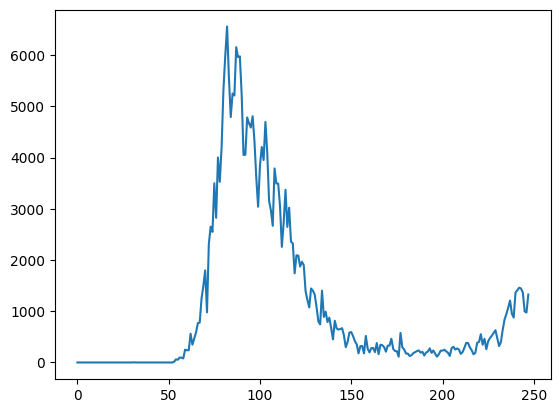

In [125]:
result_df.new_cases.plot()



While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

The no of cases increases to a certain point, then it goes down and it seems that it goes gain, means second wave happening 

In [127]:
result_df.set_index('date', inplace=True)

In [128]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267464.0,1.0,35473.0,53541.0,5117788.0,4423.683650,586.700753,84644.943252
2020-08-31,1365.0,268829.0,4.0,35477.0,42583.0,5160371.0,4446.259878,586.766910,85349.238862
2020-09-01,996.0,269825.0,6.0,35483.0,54395.0,5214766.0,4462.733082,586.866146,86248.897403


Now we will access values with date value as a key 

In [129]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.698250e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.462733e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

In [130]:
#Each of the column will have date as an index. Let us access it

result_df.new_cases

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-08-30    1444.0
2020-08-31    1365.0
2020-09-01     996.0
2020-09-02     975.0
2020-09-03    1326.0
Name: new_cases, Length: 248, dtype: float64

##### Lets plot new cases and new deaths per day as line graph

<Axes: xlabel='date'>

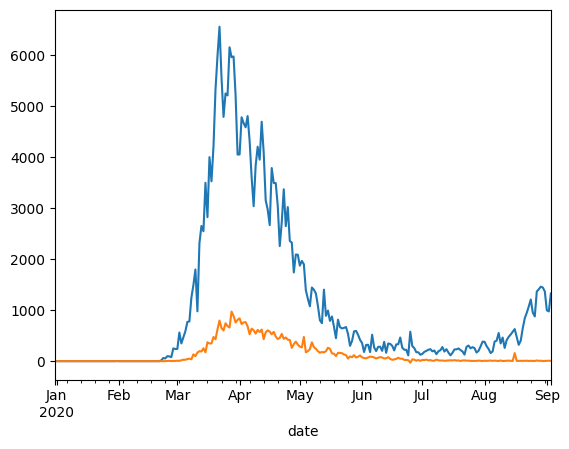

In [132]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

Between Mar and Apr the max no of cases reached, and after about a week peak no of deaths reached.

Let us compare total cases with the total no of deaths

<Axes: xlabel='date'>

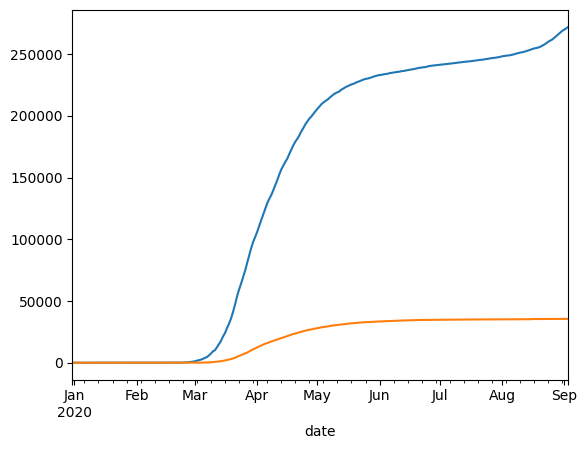

In [134]:
result_df.total_cases.plot()
result_df.total_deaths.plot()

In [135]:
death_rate = result_df.total_deaths / result_df.total_cases

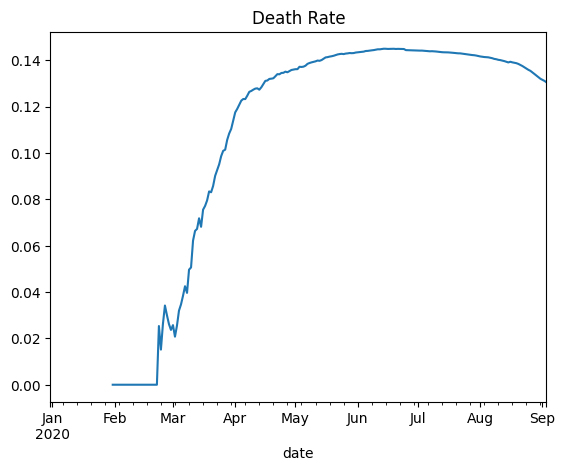

In [136]:
death_rate.plot(title='Death Rate');

Initially itt is low as no of cases were low. Testing was limited ans deaths were not diagnosed as covid deaths but over the time the no is increased as the contact is increased. after jun it seems that the pressure is not high on hospital by which it goes down

<Axes: title={'center': 'Positive Rate'}, xlabel='date'>

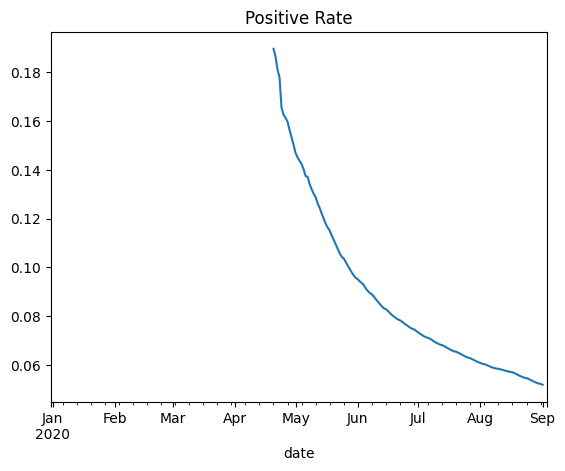

In [137]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate')

ver time testing was increased to cover a wider no of people, after that it goes down as only international traveller, those who came in contact with covid patient, and people having symptoms got tested then

<Axes: xlabel='month'>

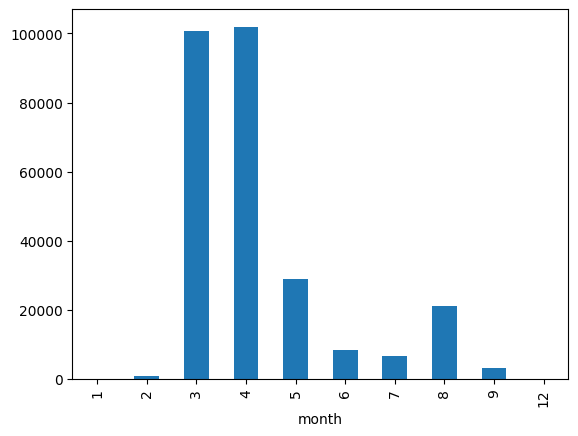

In [142]:
# month fd group by 

covid_month_df.new_cases.plot(kind = 'bar')

During months march and april no of cases went about almost 1 lakh in Italy

<Axes: xlabel='month'>

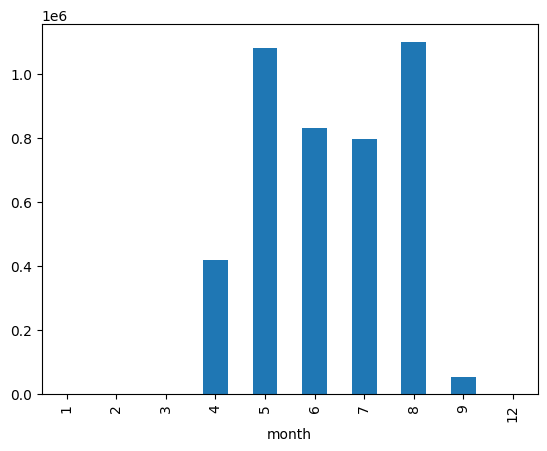

In [144]:
covid_month_df.new_tests.plot( kind= 'bar')

Do pandas assignment starting from 5.40.00 

Perform here